In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
## creates file path for raw data
raw_data_file_path = os.path.join('raw_data', 'ncaa_mens_march_madness_historical_results.csv')

In [3]:
## create a team-game level dataframe
## includes original statistics, a game id, a  flag for win-loss, and a seed matchup id
march_madness_df = pd.read_csv(raw_data_file_path)
march_madness_df.reset_index(inplace=True)
final_columns = ['game_id', 'date', 'round', 'region', 'seed', 'team',
                 'score', 'opponent_seed', 'opponent', 'opponent_score', 'overtime']
winner_df = march_madness_df.copy()
winner_df.columns = final_columns
loser_df = march_madness_df.copy()
loser_df.columns = ['game_id', 'date', 'round', 'region', 'opponent_seed', 'opponent',
                    'opponent_score', 'seed', 'team', 'score', 'overtime']
loser_df = loser_df[final_columns]
team_game_df = winner_df.append(loser_df, ignore_index=True)
team_game_df = team_game_df.sort_values('game_id')
team_game_df.reset_index(drop=True, inplace=True)
team_game_df['score_diff'] = team_game_df['score'] - team_game_df['opponent_score']
team_game_df["win"] = [1 if score_diff > 0 else 0 for score_diff in team_game_df['score_diff']]
team_game_df['seed_id'] = ''
for  index, row in team_game_df.iterrows():
    seed = team_game_df.loc[index]['seed']
    opponent_seed = team_game_df.loc[index]['opponent_seed']
    if seed < opponent_seed:
        seed_id = f'{seed}_{opponent_seed}_fav'
    elif seed > opponent_seed:
        seed_id = f'{opponent_seed}_{seed}_dog'
    else:
        seed_id = f'{seed}_{seed}'
    team_game_df.loc[index, 'seed_id'] = seed_id
team_game_df    

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav


In [4]:
split_date = team_game_df["date"].str.split("-")
count = 0
for row in split_date:
    team_game_df.at[count,'year'] = row[0]
    count += 1
team_game_df

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id,year
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav,1985
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog,1985
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav,1985
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog,1985
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav,1985
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog,1985
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog,1985
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav,1985
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog,1985
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav,1985


In [5]:
#Group by team to get all games played by each school in the NCAA tournament
grouped_by_team = team_game_df.groupby(by="team")

In [6]:
#calculate stats for each team and find "best" in each category
columns = ["Team","Tournament Appearances","Games Played","Games Won","Expected Wins","Win Percentage","Expected Win Percentage","Point Margin","Average Point Margin","Average Number of Wins"]
team_performance_summary = pd.DataFrame(columns=columns)
team_count = 0
for team,group in grouped_by_team:
    tournament_appearances = group['year'].nunique()
    games_played = len(group.index)
    games_won = group["win"].sum()
    total_point_margin = (group["score"]-group["opponent_score"]).sum()
    average_point_margin = total_point_margin/games_played
    average_num_wins = games_won/tournament_appearances
    
    #if else for expected wins (use number of wins expected for that seed. 1s get extra 0.25 for championship game?)
    ############################################################################################################################
    seeds = [int(group.loc[group.index[0],'seed'])]
    if len(group.index) > 1:
        previous_year = group.loc[group.index[0],'year']
        for index,row in group.iterrows():
            if row["year"] != previous_year:
                seeds.append(int(row['seed']))
            previous_year = row["year"]
    expected_wins = 0
    for seed in seeds:
        if (seed > 4) and (seed < 9):
            expected_wins += 1
        elif (seed > 2) and (seed < 5):
            expected_wins += 2
        elif (seed == 2):
            expected_wins += 3
        elif (seed == 1):
            expected_wins += 4.25
    win_percentage = games_won/games_played
    if expected_wins == 0:
        expected_win_percentage = games_won
    else:
        expected_win_percentage = games_won/expected_wins
    row_to_add = {'Team':team,
                  'Tournament Appearances':tournament_appearances,
                  'Games Played':games_played,
                  'Games Won':games_won,
                  'Expected Wins':expected_wins,
                  'Win Percentage':win_percentage,
                  'Expected Win Percentage':expected_win_percentage,
                  'Point Margin':total_point_margin,
                  'Average Point Margin':average_point_margin,
                  'Average Number of Wins':average_num_wins
                 }
    team_performance_summary.loc[team_count,:] = row_to_add
    team_count +=1
team_performance_summary

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
0,Air Force,2,2,0,0,0,0,-20,-10,0
1,Akron,4,4,0,0,0,0,-78,-19.5,0
2,Alabama,15,33,18,16,0.545455,1.125,34,1.0303,1.2
3,Alabama A&M,1,1,0,0,0,0,-10,-10,0
4,Alabama State,4,4,0,0,0,0,-93,-23.25,0
5,Albany,5,6,1,0,0.166667,1,-66,-11,0.2
6,Alcorn State,2,2,0,0,0,0,-16,-8,0
7,American,3,3,0,0,0,0,-68,-22.6667,0
8,Appalachian State,1,1,0,0,0,0,-26,-26,0
9,Arizona,30,81,52,61.5,0.641975,0.845528,582,7.18519,1.73333


In [7]:
#Most Tournament Appearances
most_appearances = team_performance_summary.sort_values(by="Tournament Appearances",ascending=False).iloc[:10,:]
most_appearances

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
65,Duke,31,116,90,97.25,0.775862,0.92545,1096,9.44828,2.90323
113,Kansas,31,106,77,92,0.726415,0.836957,979,9.23585,2.48387
9,Arizona,30,81,52,61.5,0.641975,0.845528,582,7.18519,1.73333
170,North Carolina,29,108,82,85,0.759259,0.964706,962,8.90741,2.82759
116,Kentucky,27,99,75,72.5,0.757576,1.03448,946,9.55556,2.77778
144,Michigan State,26,78,53,46.25,0.679487,1.14595,297,3.80769,2.03846
245,Syracuse,26,77,52,51.5,0.675325,1.00971,424,5.50649,2
105,Indiana,25,59,35,42.75,0.59322,0.818713,212,3.59322,1.4
249,Texas,25,54,29,28.25,0.537037,1.02655,87,1.61111,1.16
290,"Xavier, Ohio",24,48,24,17,0.5,1.41176,19,0.395833,1


In [8]:
#Most Games Won
most_wins = team_performance_summary.sort_values(by="Games Won",ascending=False).iloc[:10,:]
most_wins

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
65,Duke,31,116,90,97.25,0.775862,0.92545,1096,9.44828,2.90323
170,North Carolina,29,108,82,85,0.759259,0.964706,962,8.90741,2.82759
113,Kansas,31,106,77,92,0.726415,0.836957,979,9.23585,2.48387
116,Kentucky,27,99,75,72.5,0.757576,1.03448,946,9.55556,2.77778
53,Connecticut,20,71,55,46.25,0.774648,1.18919,527,7.42254,2.75
144,Michigan State,26,78,53,46.25,0.679487,1.14595,297,3.80769,2.03846
245,Syracuse,26,77,52,51.5,0.675325,1.00971,424,5.50649,2
9,Arizona,30,81,52,61.5,0.641975,0.845528,582,7.18519,1.73333
128,Louisville,24,70,48,40.5,0.685714,1.18519,398,5.68571,2
264,UCLA,24,67,44,41.75,0.656716,1.05389,286,4.26866,1.83333


In [9]:
#Best Win %
best_win_percentage = team_performance_summary.sort_values(by="Win Percentage",ascending=False).iloc[:10,:]
best_win_percentage

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
65,Duke,31,116,90,97.25,0.775862,0.92545,1096,9.44828,2.90323
53,Connecticut,20,71,55,46.25,0.774648,1.18919,527,7.42254,2.75
170,North Carolina,29,108,82,85,0.759259,0.964706,962,8.90741,2.82759
116,Kentucky,27,99,75,72.5,0.757576,1.03448,946,9.55556,2.77778
113,Kansas,31,106,77,92,0.726415,0.836957,979,9.23585,2.48387
75,Florida,19,59,42,32.5,0.711864,1.29231,402,6.81356,2.21053
128,Louisville,24,70,48,40.5,0.685714,1.18519,398,5.68571,2
143,Michigan,18,54,37,31.5,0.685185,1.1746,228,4.22222,2.05556
144,Michigan State,26,78,53,46.25,0.679487,1.14595,297,3.80769,2.03846
245,Syracuse,26,77,52,51.5,0.675325,1.00971,424,5.50649,2


In [10]:
#Best Expected Win %
best_expected_win_percentage = team_performance_summary.sort_values(by="Expected Win Percentage",ascending=False).iloc[:10,:]
best_expected_win_percentage

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
209,Richmond,8,14,6,1,0.428571,6,-101,-7.21429,0.75
83,George Mason,6,11,5,1,0.454545,5,-77,-7,0.833333
184,Northern Iowa,8,13,5,1,0.384615,5,-19,-1.46154,0.625
115,Kent State,5,9,4,0,0.444444,4,-40,-4.44444,0.8
129,Loyola Marymount,3,7,4,0,0.571429,4,-16,-2.28571,1.33333
221,Siena,6,10,4,0,0.4,4,-40,-4,0.666667
84,George Washington,9,13,4,1,0.307692,4,-88,-6.76923,0.444444
29,Butler,13,32,19,6,0.59375,3.16667,32,1,1.46154
192,Old Dominion,9,12,3,1,0.25,3,-92,-7.66667,0.333333
48,Cleveland State,2,5,3,0,0.6,3,10,2,1.5


In [11]:
#Best Average Margin of Victory
best_average_point_margin = team_performance_summary.sort_values(by="Average Point Margin",ascending=False).iloc[:10,:]
best_average_point_margin

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
116,Kentucky,27,99,75,72.5,0.757576,1.03448,946,9.55556,2.77778
65,Duke,31,116,90,97.25,0.775862,0.92545,1096,9.44828,2.90323
113,Kansas,31,106,77,92,0.726415,0.836957,979,9.23585,2.48387
170,North Carolina,29,108,82,85,0.759259,0.964706,962,8.90741,2.82759
53,Connecticut,20,71,55,46.25,0.774648,1.18919,527,7.42254,2.75
9,Arizona,30,81,52,61.5,0.641975,0.845528,582,7.18519,1.73333
75,Florida,19,59,42,32.5,0.711864,1.29231,402,6.81356,2.21053
278,Washington State,3,6,3,5,0.5,0.6,39,6.5,1
128,Louisville,24,70,48,40.5,0.685714,1.18519,398,5.68571,2
245,Syracuse,26,77,52,51.5,0.675325,1.00971,424,5.50649,2


In [12]:
#Most Average Number of Wins Per Year
most_average_num_wins = team_performance_summary.sort_values(by="Average Number of Wins",ascending=False).iloc[:10,:]
most_average_num_wins

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
65,Duke,31,116,90,97.25,0.775862,0.92545,1096,9.44828,2.90323
170,North Carolina,29,108,82,85,0.759259,0.964706,962,8.90741,2.82759
116,Kentucky,27,99,75,72.5,0.757576,1.03448,946,9.55556,2.77778
53,Connecticut,20,71,55,46.25,0.774648,1.18919,527,7.42254,2.75
113,Kansas,31,106,77,92,0.726415,0.836957,979,9.23585,2.48387
75,Florida,19,59,42,32.5,0.711864,1.29231,402,6.81356,2.21053
143,Michigan,18,54,37,31.5,0.685185,1.1746,228,4.22222,2.05556
144,Michigan State,26,78,53,46.25,0.679487,1.14595,297,3.80769,2.03846
245,Syracuse,26,77,52,51.5,0.675325,1.00971,424,5.50649,2
128,Louisville,24,70,48,40.5,0.685714,1.18519,398,5.68571,2


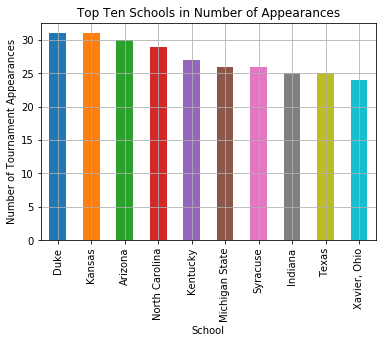

In [13]:
#create plots
#Top Teams # of Appearances
x = np.arange(len(most_appearances.index))
most_appearances["Tournament Appearances"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_appearances['Team']))
plt.xlabel('School')
plt.ylabel("Number of Tournament Appearances")
plt.title("Top Ten Schools in Number of Appearances")
plt.show()

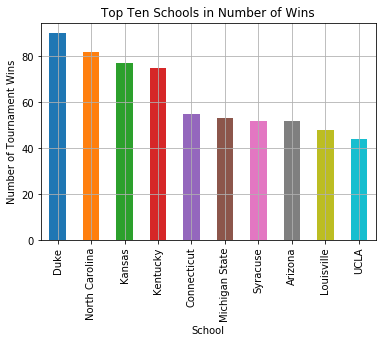

In [14]:
#Top Teams # of Wins
x = np.arange(len(most_wins.index))
most_wins["Games Won"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_wins['Team']))
plt.xlabel('School')
plt.ylabel("Number of Tournament Wins")
plt.title("Top Ten Schools in Number of Wins")
plt.show()

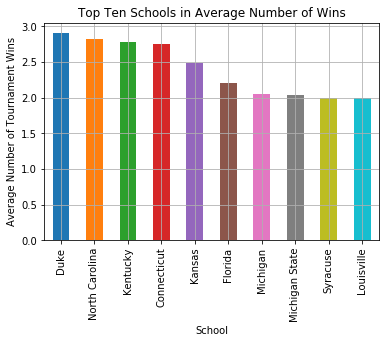

In [15]:
#Top Teams Average # of Wins
x = np.arange(len(most_average_num_wins.index))
most_average_num_wins["Average Number of Wins"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_average_num_wins['Team']))
plt.xlabel('School')
plt.ylabel("Average Number of Tournament Wins")
plt.title("Top Ten Schools in Average Number of Wins")
plt.show()

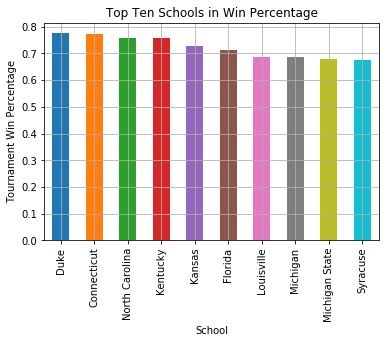

In [16]:
#Top Teams Win %
x = np.arange(len(best_win_percentage.index))
best_win_percentage["Win Percentage"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_win_percentage['Team']))
plt.xlabel('School')
plt.ylabel("Tournament Win Percentage")
plt.title("Top Ten Schools in Win Percentage")
plt.show()

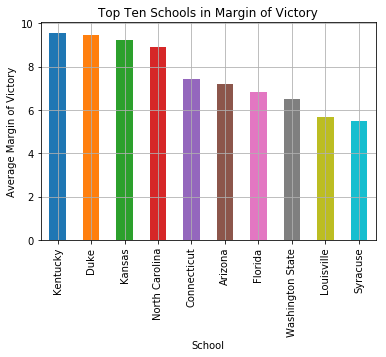

In [17]:
#Top Teams Average Win Margin
x = np.arange(len(best_average_point_margin.index))
best_average_point_margin["Average Point Margin"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_average_point_margin['Team']))
plt.xlabel('School')
plt.ylabel("Average Margin of Victory")
plt.title("Top Ten Schools in Margin of Victory")
plt.show()

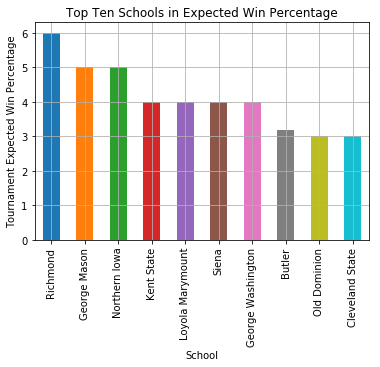

In [18]:
#Top Teams Wins vs. Expectation (who overperforms seeds?)
x = np.arange(len(best_expected_win_percentage.index))
best_expected_win_percentage["Expected Win Percentage"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_expected_win_percentage['Team']))
plt.xlabel('School')
plt.ylabel("Tournament Expected Win Percentage")
plt.title("Top Ten Schools in Expected Win Percentage")
plt.show()

In [19]:
#create function to summarize team's historical performance
team = "Air Force"
group = grouped_by_team.get_group(team)
columns = ["Team","Tournament Appearances","Games Played","Games Won","Expected Wins","Win Percentage","Expected Win Percentage","Point Margin","Average Point Margin","Average Number of Wins"]
team_performance_summary_individual = pd.DataFrame(columns=columns)

tournament_appearances = group['year'].nunique()
games_played = len(group.index)
games_won = group["win"].sum()
total_point_margin = (group["score"]-group["opponent_score"]).sum()
average_point_margin = total_point_margin/games_played
average_num_wins = games_won/tournament_appearances
    
#if else for expected wins (use number of wins expected for that seed. 1s get extra 0.25 for championship game?)
############################################################################################################################
seeds = [int(group.loc[group.index[0],'seed'])]
if len(group.index) > 1:
    previous_year = group.loc[group.index[0],'year']
    for index,row in group.iterrows():
        if row["year"] != previous_year:
            seeds.append(int(row['seed']))
        previous_year = row["year"]
        expected_wins = 0
for seed in seeds:
    if (seed > 4) and (seed < 9):
        expected_wins += 1
    elif (seed > 2) and (seed < 5):
        expected_wins += 2
    elif (seed == 2):
        expected_wins += 3
    elif (seed == 1):
        expected_wins += 4.25
win_percentage = games_won/games_played
if expected_wins == 0:
    expected_win_percentage = games_won
else:
    expected_win_percentage = games_won/expected_wins
row_to_add = {'Team':team,
              'Tournament Appearances':tournament_appearances,
              'Games Played':games_played,
              'Games Won':games_won,
              'Expected Wins':expected_wins,
              'Win Percentage':win_percentage,
              'Expected Win Percentage':expected_win_percentage,
              'Point Margin':total_point_margin,
              'Average Point Margin':average_point_margin,
              'Average Number of Wins':average_num_wins
             }
team_performance_summary_individual.loc[team_count,:] = row_to_add
team_count +=1
team_performance_summary_individual

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
292,Air Force,2,2,0,0,0,0,-20,-10,0
